In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mygene
import h5py
import networkx as nx
import seaborn as sns
%matplotlib inline

In [52]:

rede = 'string'

In [53]:
hist_complete = pd.read_csv(f'C:/Users/renan/Desktop/experiments/GCN/gridsearch/{rede}_complete_gridsearch.tsv', sep='\t')

hist_complete

,epochs,loss,acc,auc_roc,auc_pr,val_loss,val_acc,val_auc_roc,val_auc_pr,fold,paramset
0,0,4333.766113,0.936963,0.235459,0.037713,1061.632324,0.937082,0.224470,0.037179,1,0
1,1,4245.662109,0.936963,0.237451,0.037737,1039.710083,0.937082,0.226285,0.037309,1,0
2,2,4157.768555,0.936963,0.237484,0.037731,1018.047058,0.937082,0.231321,0.037517,1,0
3,3,4071.096436,0.936963,0.236948,0.037694,996.476501,0.937082,0.225647,0.037218,1,0
4,4,3984.828857,0.936963,0.235724,0.037601,974.982117,0.937082,0.226857,0.037304,1,0
...,...,...,...,...,...,...,...,...,...,...,...
719995,495,140.703049,0.911200,0.892898,0.526498,34.311829,0.855357,0.906651,0.523527,5,287
719996,496,138.140259,0.849955,0.892955,0.522736,34.176544,0.857589,0.906822,0.524970,5,287
719997,497,139.189758,0.841700,0.892187,0.519751,35.089729,0.920089,0.904140,0.542204,5,287
719998,498,141.560394,0.917894,0.894747,0.531390,34.010075,0.866071,0.906225,0.525494,5,287


In [54]:
final_epochs = hist_complete.loc[hist_complete['epochs'] == 499]
final_epochs

,epochs,loss,acc,auc_roc,auc_pr,val_loss,val_acc,val_auc_roc,val_auc_pr,fold,paramset
499,499,633.128784,0.936963,0.742104,0.126772,158.213226,0.937082,0.740405,0.131679,1,0
999,499,610.858765,0.936963,0.787492,0.189375,146.798401,0.937082,0.818289,0.221589,2,0
1499,499,583.468018,0.936963,0.821947,0.270552,152.506744,0.937082,0.776988,0.196430,3,0
1999,499,671.711914,0.937075,0.653087,0.085658,171.426620,0.936635,0.653791,0.088401,4,0
2499,499,614.814941,0.936970,0.782829,0.184746,150.120926,0.937054,0.806564,0.199034,5,0
...,...,...,...,...,...,...,...,...,...,...,...
717999,499,137.537506,0.896352,0.896713,0.537482,36.031857,0.816154,0.885770,0.488935,1,287
718499,499,139.092789,0.902265,0.896491,0.512922,38.126846,0.857653,0.886150,0.564467,2,287
718999,499,137.585617,0.887203,0.895452,0.505385,38.623116,0.908523,0.880225,0.441220,3,287
719499,499,128.966248,0.869910,0.908814,0.542639,37.063660,0.862115,0.873637,0.532754,4,287


In [5]:
auc_pr_mean = []
auc_pr_std = []
val_auc_pr_mean = []
val_auc_pr_std = []
parametros = []

for paramset in range(288):
    feature_part = hist_complete.loc[hist_complete['paramset'] == paramset]

    count_values = feature_part.loc[feature_part['epochs'] == 499]

    auc_pr_mean.append(count_values.auc_pr.mean())
    auc_pr_std.append(count_values.auc_pr.std())
      
    val_auc_pr_mean.append(count_values.val_auc_pr.mean())
    val_auc_pr_std.append(count_values.val_auc_pr.std())

    parametros.append(paramset)
    paramset=+1

In [ ]:
df_medias = pd.DataFrame({"paramset": parametros, "auc_pr_mean": auc_pr_mean, "auc_pr_std": auc_pr_std, "val_auc_pr_mean": val_auc_pr_mean, "val_auc_pr_std": val_auc_pr_std})
df_medias

In [26]:
#df_medias.to_csv(f'C:/Users/renan/Desktop/experiments/GCN/gridsearch/{rede}_mean_gridsearch.tsv', sep='\t', index=False)

In [55]:
df_medias2 = pd.read_csv(f'C:/Users/renan/Desktop/experiments/GCN/gridsearch/{rede}_mean_gridsearch.tsv', sep='\t')
df_medias2


,paramset,auc_pr_mean,auc_pr_std,val_auc_pr_mean,val_auc_pr_std
0,0,0.171421,0.070135,0.167427,0.055446
1,1,0.493442,0.014228,0.486792,0.032485
2,2,0.404723,0.028659,0.399697,0.037758
3,3,0.513157,0.013478,0.503702,0.061423
4,4,0.485516,0.013777,0.477390,0.043899
...,...,...,...,...,...
283,283,0.496371,0.024702,0.479650,0.094450
284,284,0.478164,0.007265,0.470770,0.027387
285,285,0.490714,0.047899,0.485496,0.043739
286,286,0.495732,0.013407,0.491115,0.069737


In [56]:
df_medias2.sort_values('val_auc_pr_mean')

,paramset,auc_pr_mean,auc_pr_std,val_auc_pr_mean,val_auc_pr_std
24,24,0.102325,0.037321,0.100372,0.030545
48,48,0.153567,0.054748,0.157828,0.053342
0,0,0.171421,0.070135,0.167427,0.055446
6,6,0.245670,0.093953,0.234085,0.092925
30,30,0.268235,0.125387,0.278687,0.140029
...,...,...,...,...,...
191,191,0.536010,0.016574,0.518355,0.052571
185,185,0.537633,0.013920,0.518856,0.036923
179,179,0.539964,0.009360,0.519015,0.047290
155,155,0.529502,0.019812,0.519204,0.036310


In [57]:
best_five = final_epochs.loc[(final_epochs['paramset'].isin([191,185,179,155,167]))]
best_five

,epochs,loss,acc,auc_roc,auc_pr,val_loss,val_acc,val_auc_roc,val_auc_pr,fold,paramset
387999,499,498.050659,0.929711,0.896993,0.526534,127.439888,0.930388,0.886727,0.544178,1,155
388499,499,484.848206,0.938414,0.899945,0.538888,120.831894,0.943775,0.895322,0.564061,2,155
388999,499,578.313721,0.945442,0.892555,0.498040,133.249771,0.925480,0.877330,0.474355,3,155
389499,499,508.551544,0.920562,0.897035,0.532814,133.012741,0.948684,0.880741,0.519251,4,155
389999,499,499.821960,0.949241,0.895746,0.551236,124.769753,0.929018,0.898653,0.494176,5,155
417999,499,181.185944,0.937521,0.899890,0.535934,47.943962,0.928603,0.884500,0.542095,1,167
418499,499,177.446793,0.939418,0.903943,0.553562,50.347370,0.942883,0.884944,0.472432,2,167
418999,499,181.031769,0.936517,0.900351,0.546815,49.252434,0.937528,0.880513,0.488707,3,167
419499,499,186.478058,0.929265,0.894320,0.527447,44.944530,0.943775,0.905731,0.551489,4,167
419999,499,183.063019,0.942994,0.898491,0.533782,47.786034,0.945089,0.881421,0.548909,5,167


In [58]:
SMALL_SIZE = 10 #10 para individual 
MEDIUM_SIZE = 18 #18 para figura individual #26 para pagina completa
BIGGER_SIZE = 20 #20 para figura individual #26 para pagina completa

plt.rc('font', size=BIGGER_SIZE)          
plt.rc('axes', titlesize=MEDIUM_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # MEDIUM_SIZE para individual
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # MEDIUM_SIZE para individual
plt.rc('legend', fontsize=MEDIUM_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE)  

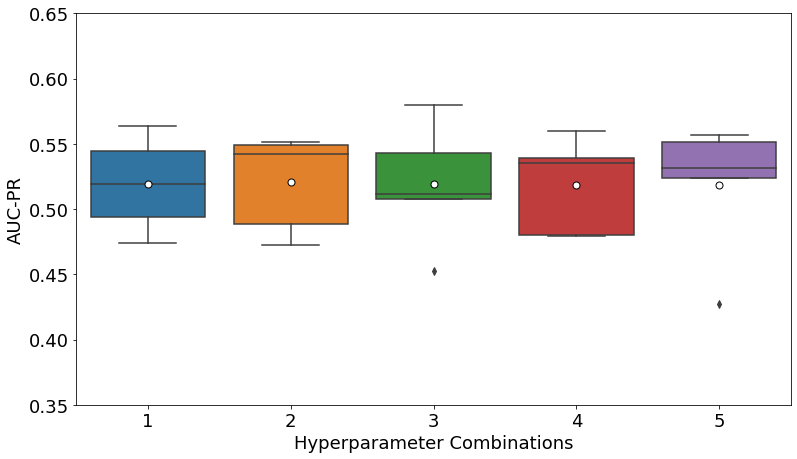

In [59]:
plt.figure(figsize=(12.80,7.20))
#plt.figure(figsize=(19.20,10.80))
#plt.title(label="STRING", fontsize=20) #20 para individual

plt.ylim(0.35, 0.65)



sns.boxplot(data=best_five, x='paramset', y="val_auc_pr", showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})
plt.xlabel("Hyperparameter Combinations")
plt.ylabel("AUC-PR")

x1 = [0, 1, 2, 3, 4]
labels = ['1', '2', '3', '4', '5']
plt.xticks(x1, labels)



file_name = f"C:/Users/renan/Desktop/boxplot/final_v2/val_boxplot_{rede}.pdf"
plt.savefig(file_name, format="pdf", bbox_inches="tight")

-----

In [122]:
SMALL_SIZE = 8
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

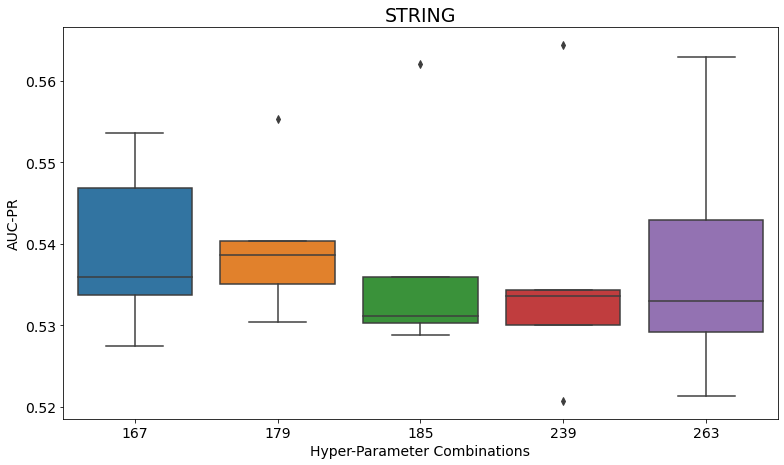

In [123]:
plt.figure(figsize=(12.80,7.20))
plt.title(label="STRING", fontsize=19)

#plt.ylim(0.5, 0.62)

sns.boxplot(data=best_five, x='paramset', y="val_auc_pr")
plt.xlabel("Hyper-Parameter Combinations")
plt.ylabel("AUC-PR")





#file_name = f"val_boxplot_{rede}.pdf"
#plt.savefig(file_name)

----